# Análisis Exploratorio de Datos (EDA): Mercado de Airbnb en Santiago de Chile

**Autor:** Felipe Bastías
**Fecha:** Agosto de 2025
**Fuente de Datos:** [Airbnb - Santiago, Chile en Kaggle](https://www.kaggle.com/datasets/cristobalbravo1/airbnb-santiago-chile)


## 1. Introducción

Este notebook presenta un análisis exploratorio del mercado de alquileres a corto plazo de Airbnb en la ciudad de Santiago de Chile. La popularidad de Airbnb ha transformado el sector turístico y de alojamiento, y entender las dinámicas de su oferta en una metrópolis como Santiago es clave para anfitriones, viajeros e incluso para la planificación urbana.

### Objetivos del Análisis

El objetivo principal de este proyecto es responder a las siguientes preguntas de negocio a través del análisis de datos:

*   **Distribución Geográfica:** ¿En qué comunas de Santiago se concentra la mayor cantidad de propiedades de Airbnb?
*   **Análisis de Precios:** ¿Cuál es la distribución de precios por noche? ¿Qué comunas tienen los precios promedio más altos y más bajos?
*   **Características de las Propiedades:** ¿Qué tipo de propiedades (apartamento completo, habitación privada, etc.) son las más comunes? ¿Cómo influye el tipo de propiedad en el precio?


In [2]:
# 1 Importación de librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para las visualizaciones
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-deep')

print("Librerías importadas y configuración aplicada.")

Librerías importadas y configuración aplicada.


In [3]:
# 2 Carga del dataset
try:
    df_raw = pd.read_csv('AirBnb_chile.csv') 
    print("Dataset cargado exitosamente.")
    print(f"El dataset tiene {df_raw.shape[0]} filas y {df_raw.shape[1]} columnas.")
except FileNotFoundError:
    print("Error: No se encontró el archivo CSV. Revisa el nombre y la ubicación.")

# Crear una copia para trabajar, manteniendo el original intacto
df = df_raw.copy()

Dataset cargado exitosamente.
El dataset tiene 15051 filas y 18 columnas.


In [4]:
# 3 Inspección básica

# Ver las primeras 5 filas para entender la estructura
print("Primeras 5 filas:")
display(df.head())


# Obtener un resumen de las columnas, tipos de datos y valores nulos
print("\nInformación general del DataFrame:")
df.info()


# Obtener estadísticas descriptivas para las columnas numéricas
print("\nEstadísticas descriptivas:")
display(df.describe())

Primeras 5 filas:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,65058,Dpto amoblado centro historico,318016,Patricio,NaN,Recoleta,-33.43049,-70.64079,Private room,NaN,2,0,NaN,NaN,1,0,0,NaN
1,73752,Barrio Lastarria,374124,Daniela&Ricardo,NaN,Santiago,-33.43865,-70.64241,Private room,NaN,3,0,NaN,NaN,1,0,0,NaN
2,80482,Room Private for Woman,154527,Jacqueline,NaN,La Florida,-33.51922,-70.59152,Private room,NaN,2,0,NaN,NaN,1,0,0,NaN
3,88944,COZY APT. PROVIDENCIA METRO WIFI TV,485358,Macarena,NaN,Providencia,-33.42141,-70.60832,Entire home/apt,39849.0,3,223,2024-12-07,1.39,1,338,18,NaN
4,90694,Apartment x Rent in Providencia 802,491253,Hector,NaN,Providencia,-33.42629,-70.61866,Entire home/apt,49999.0,3,76,2024-09-01,0.46,2,364,5,NaN



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15051 entries, 0 to 15050
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15051 non-null  int64  
 1   name                            15051 non-null  object 
 2   host_id                         15051 non-null  int64  
 3   host_name                       15051 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   15051 non-null  object 
 6   latitude                        15051 non-null  float64
 7   longitude                       15051 non-null  float64
 8   room_type                       15051 non-null  object 
 9   price                           13062 non-null  float64
 10  minimum_nights                  15051 non-null  int64  
 11  number_of_reviews               15051 non-null  int64  
 

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.505100e+04,1.505100e+04,0.0,15051.000000,15051.000000,1.306200e+04,15051.000000,15051.000000,11807.000000,15051.000000,15051.000000,15051.000000
mean,6.918919e+17,2.509498e+08,NaN,-33.433862,-70.609902,8.535579e+04,5.779882,30.188825,1.819057,10.703276,238.029367,11.845592
std,5.215153e+17,1.949503e+08,NaN,0.032789,0.077692,9.882005e+05,32.644400,57.823198,1.941892,32.518195,130.914049,18.103587
min,4.939200e+04,1.961100e+04,NaN,-33.595035,-70.868220,7.762000e+03,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,4.006139e+07,7.614145e+07,NaN,-33.448887,-70.647865,3.156425e+04,1.000000,1.000000,0.390000,1.000000,128.000000,0.000000
50%,8.825948e+17,1.975964e+08,NaN,-33.437670,-70.626490,4.385700e+04,2.000000,9.000000,1.170000,2.000000,270.000000,4.000000
75%,1.163723e+18,4.304434e+08,NaN,-33.420413,-70.592031,6.500000e+04,3.000000,33.000000,2.645000,5.000000,358.000000,17.000000
max,1.319810e+18,6.687066e+08,NaN,-33.243830,-70.220310,9.692788e+07,1124.000000,1227.000000,23.560000,213.000000,365.000000,321.000000


In [5]:
# 4 Limpieza

# Hacemos una copia para no modificar la original mientras modificamos el df
df_limpio = df.copy()

# Eliminamos las columnas que no tienen valores o que no aportan valor
columnas_a_eliminar = ['neighbourhood_group', 'last_review',"calculated_host_listings_count", "license"]
df_limpio.drop(columns=columnas_a_eliminar, inplace=True)

# Contar valores faltantes por columna
print("Valores faltantes por columna:")
print(df_limpio.isnull().sum())

# Si 'reviews_per_month' tiene nulos, es porque no hay reseñas. Podemos rellenarlos con 0.
df_limpio['reviews_per_month'] = df_limpio['reviews_per_month'].fillna(0)


print("\nValores faltantes después de la limpieza:")
print(df_limpio.isnull().sum())

Valores faltantes por columna:
id                          0
name                        0
host_id                     0
host_name                   0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                    1989
minimum_nights              0
number_of_reviews           0
reviews_per_month        3244
availability_365            0
number_of_reviews_ltm       0
dtype: int64

Valores faltantes después de la limpieza:
id                          0
name                        0
host_id                     0
host_name                   0
neighbourhood               0
latitude                    0
longitude                   0
room_type                   0
price                    1989
minimum_nights              0
number_of_reviews           0
reviews_per_month           0
availability_365            0
number_of_reviews_ltm       0
dtype: int64


In [ ]:
# 5 Estandarización de columnas

# Ver las comunas disponibles
print("Comunas/barrios disponibles:")
print(df_limpio['neighbourhood'].value_counts())

# Aquí, si vieras inconsistencias como "Santiago" y "Santiago ", las corregirías.
# df_limpio['neighbourhood'] = df_limpio['neighbourhood'].str.strip() # Ejemplo para quitar espacios

Comunas/barrios disponibles:
neighbourhood
Santiago               5492
Providencia            2727
Las Condes             2428
Ñuñoa                  1184
Lo Barnechea            742
Vitacura                346
Recoleta                299
Estación Central        274
La Florida              214
Macul                   170
San Miguel              162
La Reina                162
Independencia           125
Peñalolén               109
Maipú                   108
Pudahuel                 91
San Joaquín              84
La Cisterna              82
Huechuraba               58
Quinta Normal            47
Quilicura                40
Renca                    23
Conchalí                 22
Cerrillos                14
Lo Prado                 11
El Bosque                10
La Granja                 9
Pedro Aguirre Cerda       8
Cerro Navia               6
San Ramón                 2
Lo Espejo                 1
La Pintana                1
Name: count, dtype: int64


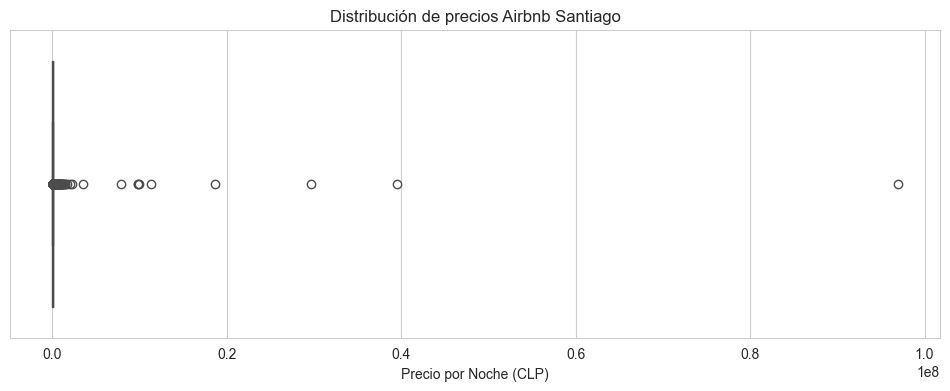

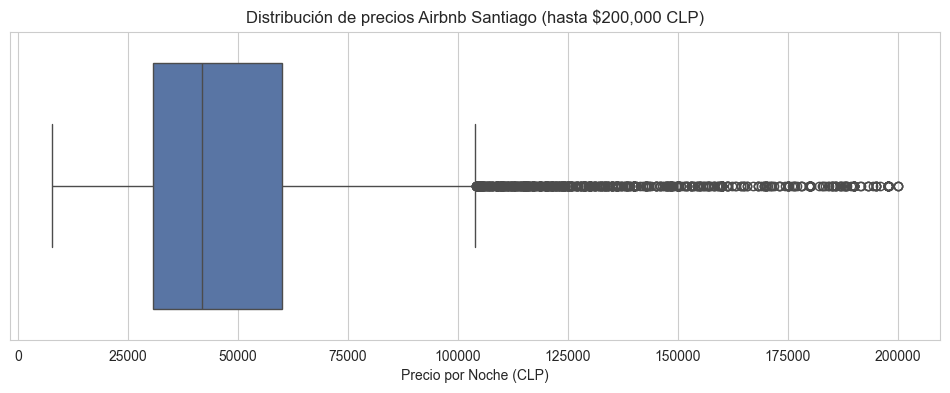

In [ ]:
# 6 Análisis por columna (univariado)

# 6.1 Distribución de precios

# Diagrama de caja para 'price'
plt.figure(figsize=(12, 4)) 
sns.boxplot(x=df_limpio['price'])
plt.title('Distribución de precios Airbnb Santiago')
plt.xlabel('Precio por noche (CLP)')
plt.show()

# Boxplot filtrado para ver mejor la distribución principal
umbral_precio = df_limpio['price'].quantile(0.95) # Excluimos el 5% más caro

plt.figure(figsize=(12, 4))
sns.boxplot(x=df_limpio[df_limpio['price'] < umbral_precio]['price'])
plt.title(f'Distribución de precios Airbnb Santiago (hasta ${umbral_precio:,.0f} CLP)')
plt.xlabel('Precio por noche (CLP)')
plt.show()


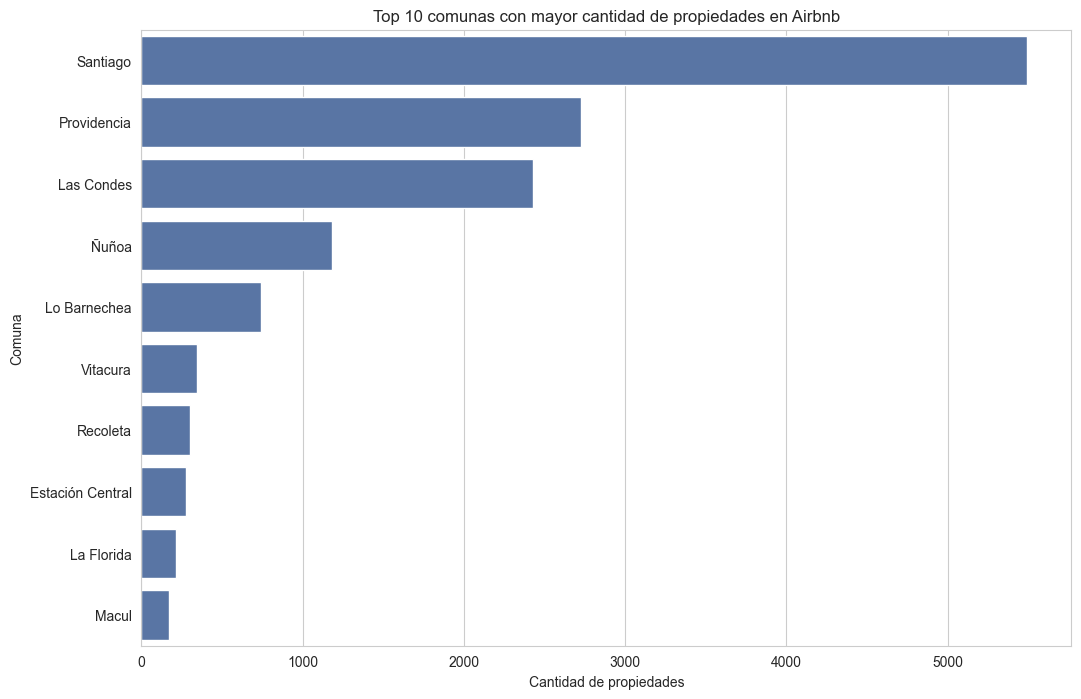

In [29]:
# 6.2 Análisis cantidad de propiedad por comuna
 
# Gráfico de barras de las 10 comunas con más propiedades
plt.figure(figsize=(12, 8))
sns.countplot(y='neighbourhood', data=df_limpio, order=df_limpio['neighbourhood'].value_counts().iloc[:10].index)
plt.title('Top 10 comunas con mayor cantidad de propiedades en Airbnb')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Comuna')
plt.show()

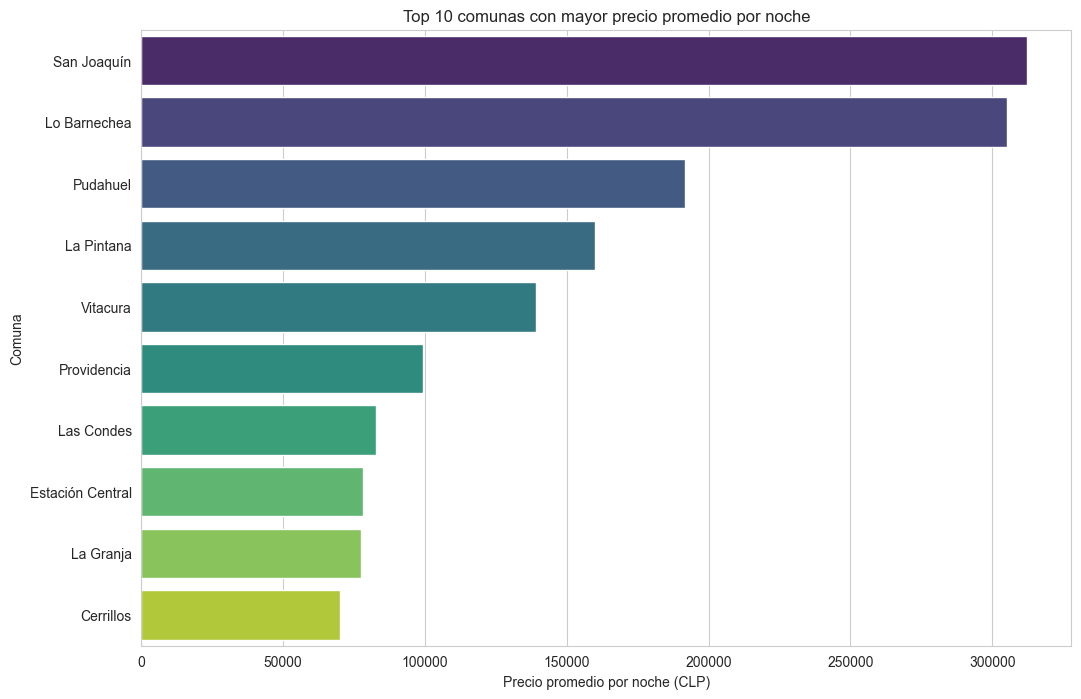

In [31]:
# 6.3 Análisis de precios por comuna

# Calcular el precio medio por comuna
precio_medio_comuna = df_limpio.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).iloc[:10]

# Gráfico de barras de los precios medios
plt.figure(figsize=(12, 8))
sns.barplot(x=precio_medio_comuna.values, y=precio_medio_comuna.index, hue=precio_medio_comuna.index, palette='viridis')
plt.title('Top 10 comunas con mayor precio promedio por noche')
plt.xlabel('Precio promedio por noche (CLP)')
plt.ylabel('Comuna')
plt.show()

(0.0, 200000.0)

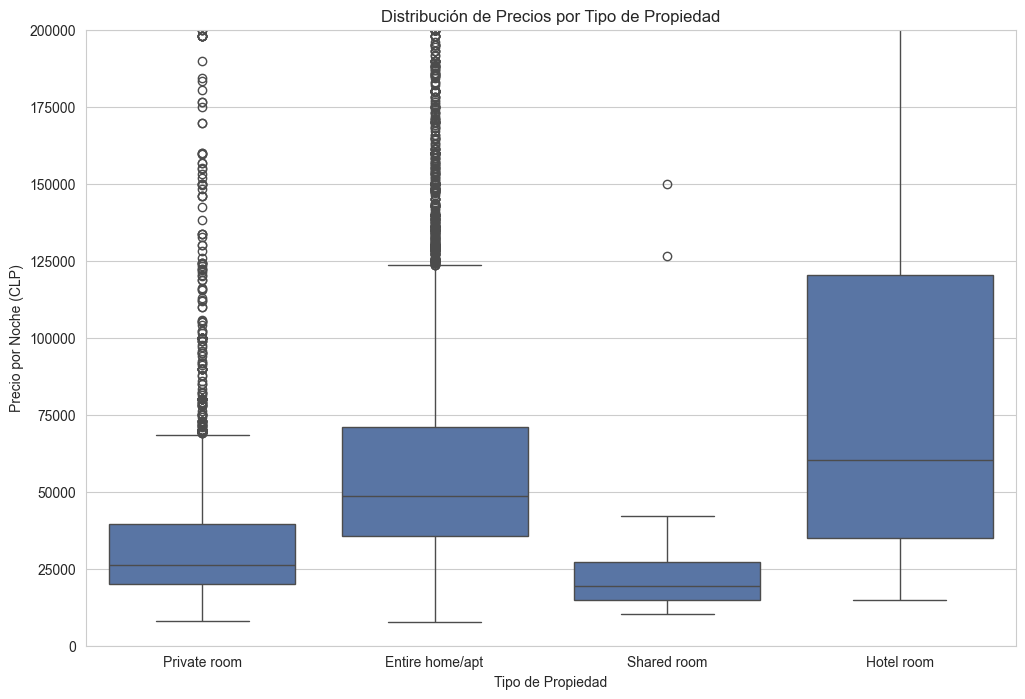

In [33]:
# 7 Análisis multivariado

# 7.1 Relación entre tipo de propiedad y precio
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_limpio, x='room_type', y='price')
plt.title('Distribución de Precios por Tipo de Propiedad')
plt.ylabel('Precio por Noche (CLP)')
plt.xlabel('Tipo de Propiedad')
plt.ylim(0, 200000) # Usamos un limitador para que los outliers no distorsionen la gráfica

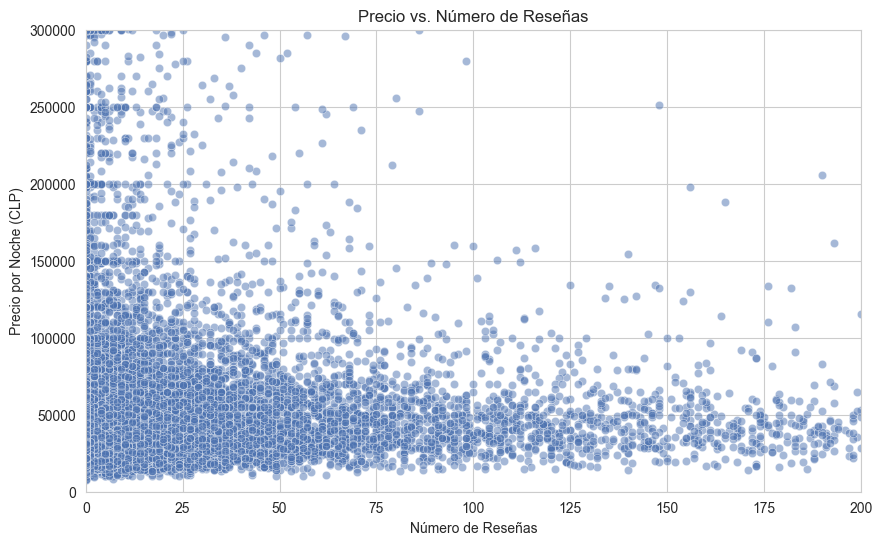

In [ ]:
# 7.2 Relación entre reseñas y precio

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_limpio, x='number_of_reviews', y='price', alpha=0.5)
plt.title('Precio vs. Número de Reseñas')
plt.xlabel('Número de Reseñas')
plt.ylabel('Precio por Noche (CLP)')
plt.xlim(0, 200) 
plt.ylim(0, 300000)
plt.show()

In [37]:
# 7.3 Exportar dataset para crear mapa de calor en Power BI

df_limpio.to_csv('df_limpio.csv', index=False)